In [29]:
from tvb.simulator.lab import *
import tvb.interfaces.command.demos as demo
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import itertools
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


/Users/mb/.virtualenvs/tvb/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
mat = scipy.io.loadmat('empirical_fMRI/empirical_fMRI.mat')
eeg = scipy.io.loadmat('HRF_200Hz.mat')

In [44]:
eeg.keys()

dict_keys(['__header__', '__version__', '__globals__', 'HRF_resEEG'])

In [45]:
data = np.asarray([x[0][0] for x in mat['fMRI'].T])
data[0].shape

(661, 68)

In [46]:
scaler = StandardScaler()
data = np.asarray([scaler.fit_transform(subj) for subj in data])
data.shape
rslt = np.empty((data[0].shape[1],data[0].shape[1]))
print(rslt.shape)

(68, 68)


In [346]:
def get_cofluct(subj):
    rslt = np.empty((subj.shape[1], subj.shape[1], subj.shape[0]))
    for i, j in itertools.combinations_with_replacement(list(range(subj.shape[1])), r=2):
        if i != j:
            rslt[i,j] = subj[:,i]*subj[:,j]
            rslt[i,j] = rslt[i,j]#/np.mean(rslt[i,j])
            #rslt[j,i] = rslt[i,j]
    return rslt

In [350]:
def get_fc(subj):
    rslt = np.empty((subj.shape[1], subj.shape[1]))
    for i, j in itertools.combinations_with_replacement(list(range(subj.shape[1])), r=2):
        if i != j:
            rslt[i,j] = np.sum(subj[:,i]*subj[:,j])/660
            rslt[i,j] = rslt[i,j]#/np.mean(rslt[i,j])
            #rslt[j,i] = rslt[i,j]
    return rslt
    

In [369]:
X = get_cofluct(data[1])

In [370]:
X_fc = get_fc(data[1])

In [266]:
#plt.imshow(np.mean(X, axis=2))

In [371]:
X2 = X.reshape((X.shape[0]**2, X.shape[2]))
X2.shape

(4624, 661)

<IPython.core.display.Javascript object>


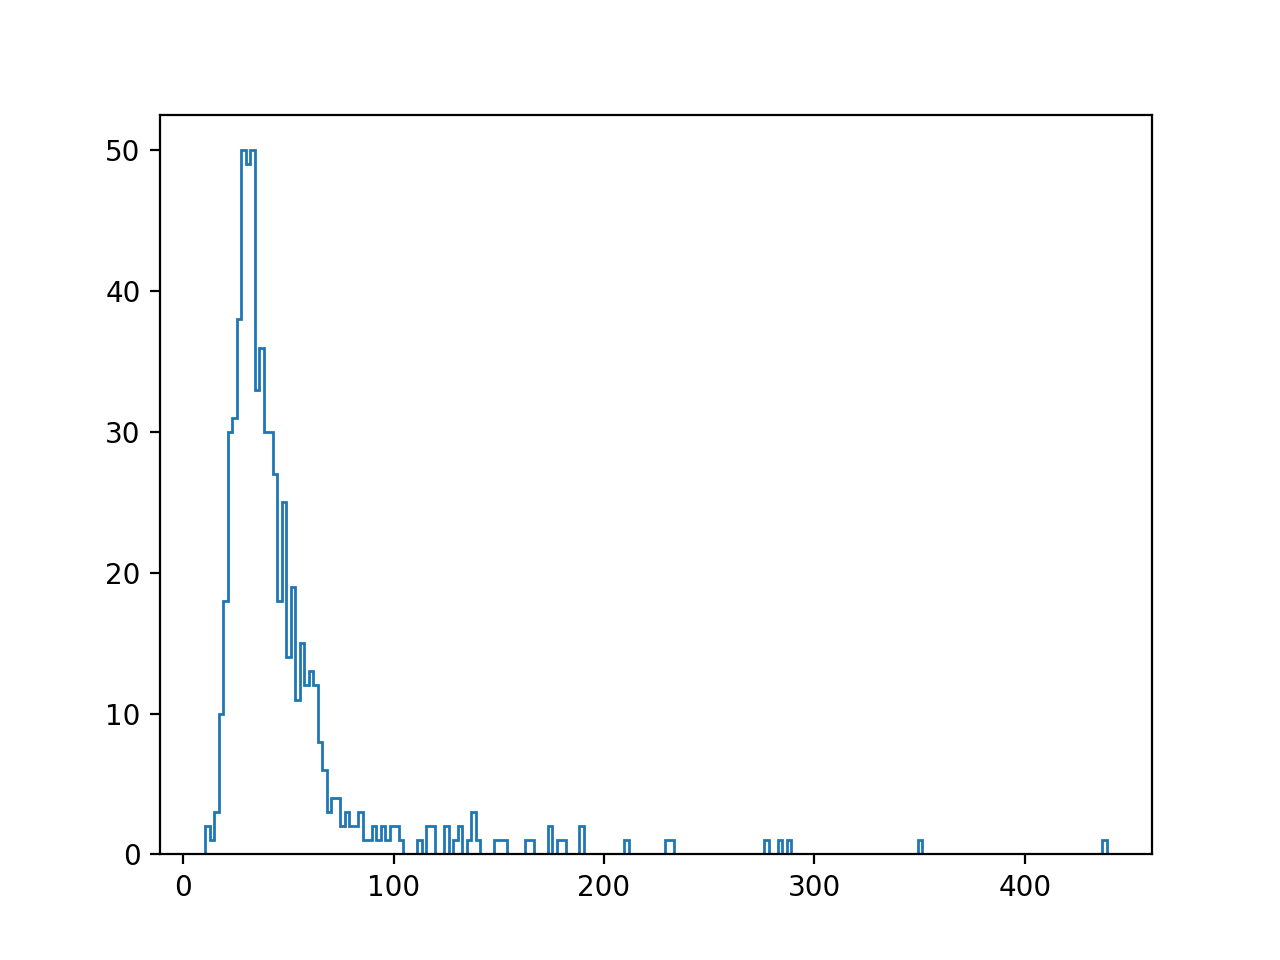

In [372]:
plt.figure()
plt.hist(np.linalg.norm(X2, axis=0), histtype='step', bins=200)
plt.show()

In [373]:
np.percentile(np.linalg.norm(X2, axis=0), [5, 95])

array([ 20.99888008, 111.39508966])

In [374]:
bottom = np.where(np.linalg.norm(X2, axis=0) <= 20.99888008, X2, 0)
bottom = bottom.reshape((68,68,661))
top = np.where(np.linalg.norm(X2, axis=0) <= 111.39508966, X2, 0)
top = top.reshape((68,68,661))

In [375]:
top_fc = np.mean(top, axis=2)
bot_fc = np.mean(bottom, axis=2)

In [376]:
np.corrcoef(np.triu(X_fc).ravel(), np.triu(bot_fc).ravel())[0,1]

0.4290141494849377

In [377]:
np.corrcoef(np.triu(X_fc).ravel(), np.triu(top_fc).ravel())[0,1]

0.9616275988907598